We'll use pandas and numpy heavily for interacting with the data. Matplotlib is used for plotting although there are several higher-level libraries built on it.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Goals of this notebook

* Introduce you to the datasets we'll be using over the next few days. Understanding what problem you are solving is the most important part of any scientific work and clearly defining what one is trying to do is a strict prerequisite to making progress.

* Introduce the bare minimum pandas you'll need to work with tabular data (stuff you can store in a CSV).

# Walmart TripType Classification

We have a dataset with the following columns:


* **TripType** - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
    
* **VisitNumber** - an id corresponding to a single trip by a single customer

* **Weekday** - the weekday of the trip

* **Upc** - the UPC number of the product purchased

* **ScanCount** - the number of the given item that was purchased. A negative value indicates a product return.

* **DepartmentDescription** - a high-level description of the item's department

* **FinelineNumber** - a more refined category for each of the products, created by Walmart

The final task is to predict TripType for each row but we need to review a few things today before we get to the prediction task tomorrow.

In [3]:
#kaggle provides a train and test dataset
# train = TripType known
# test = TripType unknown
# final task = train model on train and predict TripType on test
# submit answers to kaggle to receive score telling you how well you did

DATA_PATH = "../data/walmart"
TRAIN_PATH = f"{DATA_PATH}/train.csv"
TEST_PATH = f"{DATA_PATH}/test.csv"

### Reading files

Pandas has functionality to read data from and write data to various formats including:

CSV

JSON

Excel (useful for many enterprises heavily reliant on Excel)

Parquet

SQL (write a query)

Feather format (very fast reads/writes)

Each read_{format} function comes with multiple options. For example, you can type "read_csv(" in a code cell below and press Shift + Tab to see all the available options.

In [4]:
pd.read_csv("click here and press shift tab"); #this will raise an error since there's no "click here and press shift tab" file

FileNotFoundError: [Errno 2] File b'click here and press shift tab' does not exist: b'click here and press shift tab'

In [5]:
#read csv
df = pd.read_csv(TRAIN_PATH)

In [6]:
#look at the first few rows
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [7]:
#print the column names
print(df.columns)

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')


In [8]:
#look at the shape = (number of rows, number of columns
df.shape

(647054, 7)

In [9]:
#index keys each row. can be anything that's unique for each row including tuples
df.index

RangeIndex(start=0, stop=647054, step=1)

In [10]:
#access a particular row - iloc = integer location where integer = [0, number of rows - 1]
df.iloc[10]

TripType                          26
VisitNumber                        8
Weekday                       Friday
Upc                      5.20001e+09
ScanCount                          1
DepartmentDescription    DSD GROCERY
FinelineNumber                  4606
Name: 10, dtype: object

In [11]:
#access a particular row - loc = location by key in index
df.loc[3]

TripType                                    26
VisitNumber                                  8
Weekday                                 Friday
Upc                                 2.2384e+09
ScanCount                                    2
DepartmentDescription    PAINT AND ACCESSORIES
FinelineNumber                            3565
Name: 3, dtype: object

In [12]:
#accessing multiple rows
df.loc[3:10]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,Friday,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,Friday,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0
8,26,8,Friday,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0
10,26,8,Friday,5.200010e+09,1,DSD GROCERY,4606.0


In [13]:
#access multiple rows and multiple columns
df.loc[3:10, ('Weekday', 'ScanCount')]

,Weekday,ScanCount
3,Friday,2
4,Friday,2
5,Friday,2
6,Friday,1
7,Friday,1
8,Friday,1
9,Friday,-1
10,Friday,1


In [14]:
#can also change values
print(df.loc[3, 'Weekday'])
#--> should give "Friday"

df.loc[3, 'Weekday'] = 'Sunday'
print(df.loc[3, 'Weekday'])
#--> should give "Sunday"

df.loc[3, 'Weekday'] = 'Friday'
print(df.loc[3, 'Weekday'])
#undo back to "Friday"

Friday
Sunday
Friday


### WARNING: Generally avoid chained assignments

df.loc[3]['Weekday'] = 'Monday'

-> Unpredictable results depending on whether df.loc[3] returns a view of the original dataframe df, or a copy. In case of a copy, you'll modify the copy and not the original dataframe. Best to use:

df.loc[3, 'Weekday'] = 'Monday'

In [15]:
#convert pandas dataframe to numpy array
np.array(df)

array([[999, 5, 'Friday', ..., -1, 'FINANCIAL SERVICES', 1000.0],
       [30, 7, 'Friday', ..., 1, 'SHOES', 8931.0],
       [30, 7, 'Friday', ..., 1, 'PERSONAL CARE', 4504.0],
       ...,
       [39, 191346, 'Sunday', ..., 1, 'PRODUCE', 4170.0],
       [8, 191347, 'Sunday', ..., 1, 'DAIRY', 1512.0],
       [8, 191347, 'Sunday', ..., 1, 'GROCERY DRY GOODS', 3600.0]],
      dtype=object)

In [16]:
#access a particular column - returns a pandas Series
df['TripType']

0         999
1          30
2          30
3          26
4          26
         ... 
647049     39
647050     39
647051     39
647052      8
647053      8
Name: TripType, Length: 647054, dtype: int64

In [17]:
#access multiple columns - returns a pandas dataframe
cols = ['TripType', 'VisitNumber']

df[cols].head()

,TripType,VisitNumber
0,999,5
1,30,7
2,30,7
3,26,8
4,26,8


In [18]:
#look at first few rows of the two columns
df[['TripType', 'VisitNumber']].head()

,TripType,VisitNumber
0,999,5
1,30,7
2,30,7
3,26,8
4,26,8


In [19]:
#find unique values in a column
df['TripType'].unique()

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,   4,  24,  33,  43,
        31,  27,  34,  18,  29,  44,  19,  23,  22,  28,  14,  12])

In [20]:
#find unique values and counts for values in a column
df['TripType'].value_counts()

40     174164
39      95504
37      38954
38      29565
25      27609
7       23199
8       22844
36      21990
44      20424
42      19468
24      18015
999     17590
9       16820
32      13843
5       13836
35      12501
33       9918
15       7147
3        6827
43       6383
41       5508
30       4861
34       4751
27       4613
21       4032
22       3592
6        3405
20       3116
18       2977
28       2664
26       2507
12       2108
29       2105
31       1765
19       1188
4         901
23        325
14         35
Name: TripType, dtype: int64

In [21]:
#unique values and counts for different column
df['Upc'].value_counts()

4.011000e+03    7657
6.053886e+10    2501
7.874235e+09    2067
7.874235e+09    1883
4.046000e+03    1652
                ... 
8.437471e+10       1
7.644011e+09       1
1.119231e+09       1
7.670528e+10       1
8.669413e+09       1
Name: Upc, Length: 97714, dtype: int64

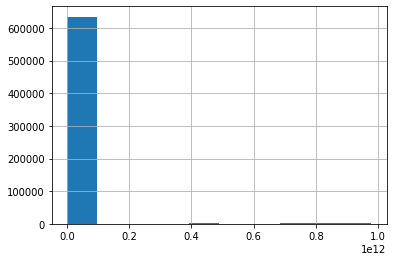

In [22]:
#histogram for values in column
df['Upc'].hist()

/home/sanjay/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sanjay/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


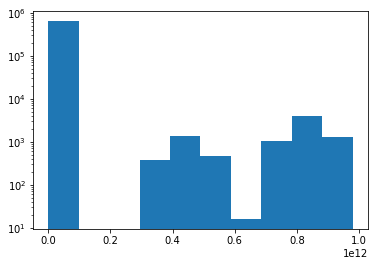

In [23]:
#alternate way of making the histogram
plt.hist(df['Upc'].tolist());
plt.yscale('log')

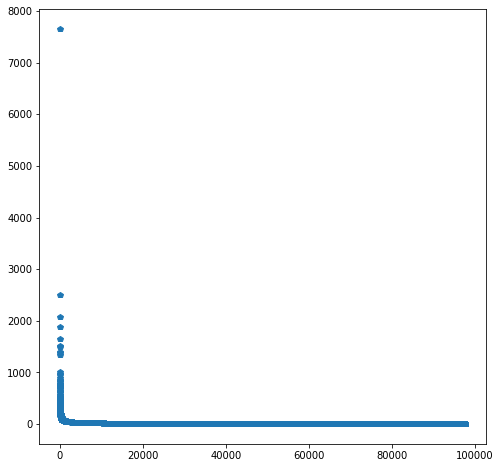

In [24]:
#plot number of unique values for "Upc" in descending order
plt.figure(figsize=(8,8))
plt.plot(df['Upc'].value_counts().tolist(), 'p')

In [25]:
df['Upc'].value_counts().head(100)

4.011000e+03    7657
6.053886e+10    2501
7.874235e+09    2067
7.874235e+09    1883
4.046000e+03    1652
                ... 
7.104114e+09     308
2.057740e+10     304
4.900005e+09     302
4.400003e+09     301
4.664000e+03     301
Name: Upc, Length: 100, dtype: int64

In [26]:
#often useful to look at pivot tables

pd.pivot_table(df, index = 'DepartmentDescription', columns = 'Weekday', values = 'TripType', aggfunc=lambda x: len(x)).loc[:, ('Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday')]

Weekday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
DepartmentDescription,,,,,,,
1-HR PHOTO,52.0,66.0,51.0,57.0,52.0,66.0,50.0
ACCESSORIES,258.0,287.0,175.0,143.0,136.0,148.0,171.0
AUTOMOTIVE,1092.0,1112.0,618.0,555.0,637.0,577.0,823.0
BAKERY,1280.0,1326.0,934.0,902.0,773.0,833.0,1120.0
BATH AND SHOWER,917.0,934.0,497.0,496.0,526.0,514.0,698.0
BEAUTY,2802.0,2754.0,1987.0,1646.0,1691.0,1689.0,2296.0
BEDDING,369.0,440.0,344.0,247.0,279.0,313.0,315.0
BOOKS AND MAGAZINES,249.0,245.0,110.0,88.0,106.0,79.0,115.0
BOYS WEAR,735.0,874.0,496.0,391.0,403.0,496.0,497.0


The table above shows the number of trips made on each day to each department. In other words, each entry in the table is the number of rows in train for that day and that department.

Some notes:

* Why would this be useful - we are trying to classify trips. While we don't know Walmart's detailed rules for assigning TripTypes, it is reasonable to assume that the departments items are bought from have a lot of bearing on their rules. Tables like these help us understand correlations between the day of week and what is being bought.

* Often such a table should be "normalized". One example is dividing each row by the total sum to get a %. This would help us compare two different departments. Otherwise the absolute numbers have very different scales across different rows.

* Another way of normalizing is across columns i.e. divide each element by the sum of the values along its column. This would give us a % distribution of departments bought from on a given day. This is also tricky since the same trip might involve more than one department and we are counting each item bought once.

We'll do more exploratory analysis below but the idea here it to show an example of a pivot table.

In [27]:
#group bys

trip_dist_by_day = df.groupby(['Weekday', 'TripType']).agg({'VisitNumber': lambda x: len(np.unique(x))})
print(trip_dist_by_day.head(10))

                  VisitNumber
Weekday TripType             
Friday  3                 794
        4                  62
        5                 751
        6                 226
        7                 877
        8                1944
        9                1565
        12                 36
        14                  1
        15                178


### Note: There is a lot of other pandas functionality that hasn't been shown above but this serves as a good introduction to what one can do with pandas.

**Additional reference**: https://pandas.pydata.org/pandas-docs/version/0.25/

# Problem Understanding

This is the part where we begin to do some exploratory analysis to understand the data we are working with. There are two general ways in which people approach a dataset:

1. Explore the data and build your intuition. This involves asking a sequence of questions and answering them with the data. This step also informs the features that should be computed to build a model.

2. The second approach is to use machine learning techniques to understand the data. This involves building a model as quickly as possible and probing the model to understand what's going on in the data.

### Approach 1: Exploratory Analysis -> Model Building

In [28]:
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


One advantage with this data is that we are all familiar with grocery shopping. Often a data scientist encounters a dataset which is very alien - for example, we could have used a particle physics dataset here and that would involve learning at least a few basic things about the underlying physics.

Here, we have data on trips taken by individuals to a Walmart store. Each trip has a unique id in **VisitNumber**.

**Question 1**: How many total visits do we have?

In [29]:
len(df['VisitNumber'].unique())

95674

Each row represents one product bought in each trip. So there are as many rows as there are products bought (there can be several quantities of each product bought but we won't worry about that now).

**Question 2**: How many total products were bought? 

In [30]:
df.shape[0]

647054

**Question 3**: How many unique products were bought per visit?

In [31]:
df.shape[0] / len(df['VisitNumber'].unique())

6.763112235299037

Now let's use our intuition. What can we record when we go shopping?

**Which day we shopped on (1 column)**: Weekday

**What items we bought (3 columns)**: we have 3 columns describing this. At the coarsest level, the UPC code (bar code) tells us exactly what item was bought. Finelineno is a more coarse description of the type of product bought. Maybe it's something like fruit juice vs biscuits (although we don't know what each value denotes). At the coarsest level, we have DepartmentDescription which is pretty self-explanatory. 

**How many items of a particular type were bought (1 column)**: Did we buy one bottle of orange juice or 3? This is captured by ScanCount. In some cases, items might be returned, in which we have ScanCount == -1.

Capturing this data in a flat structure is a bit tricky so instead of having a list of items and their counts on each row, we have one row for each distinct product bought in each trip. To keep track of which trip a product belongs to, we have the **VisitNumber** column as stated above. This is a unique id for each shopper's trip.

Lastly, we have the **TripType** column which is an internal flag set by Walmart to classify each trip. Our task is to predict this tag for each visit. At this stage, we should ask a few careful questions. In the train set and test set, each row has **one** product. Is our task to predict the TripType for each *product*? That doesn't really make sense. I might be on a food shopping trip but buy a couple of batteries on the side. Clearly, the row with the same VisitNumber but the battery product should be still classified as a food shopping trip. This seems to imply that we should aggregate all the products for a trip, flatten it into some reasonable data structure and use that to predict the TripType.

**Question 4**: Do all the entries/rows for the same visit number have the same trip type? Or do we have cases where visit number N (for some N) has different trip types based on the product?

In [32]:
df.groupby('VisitNumber').agg({'TripType': lambda x: len(np.unique(x))})['TripType'].unique()

array([1])

In [33]:
print(df[['VisitNumber', 'TripType']].drop_duplicates()['VisitNumber'].shape)
print(df[['VisitNumber', 'TripType']].drop_duplicates()['VisitNumber'].drop_duplicates().shape)

(95674,)
(95674,)


**Question 5**: How many unique trip types are there? What are their counts?

In [34]:
df['TripType'].value_counts()

40     174164
39      95504
37      38954
38      29565
25      27609
7       23199
8       22844
36      21990
44      20424
42      19468
24      18015
999     17590
9       16820
32      13843
5       13836
35      12501
33       9918
15       7147
3        6827
43       6383
41       5508
30       4861
34       4751
27       4613
21       4032
22       3592
6        3405
20       3116
18       2977
28       2664
26       2507
12       2108
29       2105
31       1765
19       1188
4         901
23        325
14         35
Name: TripType, dtype: int64

**Question 6**: For each trip, compute the total number of unique products (UPC), the total count of products ("ScanCount"), total number of unique Fileno and total number of unique DepartmentDescriptions

In [35]:
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [37]:
df.groupby(['VisitNumber']).agg({'Upc': lambda x: len(np.unique(x)),
                                 'FinelineNumber': lambda x: len(np.unique(x)),
                                 'DepartmentDescription': lambda x: len(np.unique(x)),
                                 'ScanCount': np.sum
                                })

TypeError: '<' not supported between instances of 'float' and 'str'

We have an issue with DepartmentDescription. Are some values floats?

**Question 7**: Debug this issue

In [38]:
df['DepartmentDescription'].dtype

#A dtype of 'O' indicates 'object' i.e. that we might have fixed types.

dtype('O')

In [39]:
df['DepartmentDescription'].unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', nan,
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

In [40]:
#there are some nan values. let's confirm this
df['DepartmentDescription'].isnull().sum()

1361

In [41]:
#let's replace these with a string "null"
df['DepartmentDescription'].fillna('nan', inplace=True)

In [42]:
unique_counts = df.groupby(['VisitNumber']).agg({'Upc': lambda x: len(np.unique(x)),
                                                 'FinelineNumber': lambda x: len(np.unique(x)),
                                                 'DepartmentDescription': lambda x: len(np.unique(x)),
                                                 'ScanCount': np.sum
                                                })

In [43]:
unique_counts.head()

,Upc,FinelineNumber,DepartmentDescription,ScanCount
VisitNumber,,,,
5,1.0,1.0,1,-1
7,2.0,2.0,2,2
8,21.0,17.0,7,28
9,3.0,3.0,2,3
10,3.0,3.0,2,3


We have some statistics for each visit. But we don't have the TripType anymore. 

**Question 8**: Use the original dataframe, df and add a column to unique_counts that contains the TripType.

Hint: Use pd.concat or pd.merge (also see pd.DataFrame.set_index)

In [44]:
df[['VisitNumber', 'TripType']].drop_duplicates().set_index('VisitNumber').head()

,TripType
VisitNumber,
5,999
7,30
8,26
9,8
10,8


In [45]:
df_collapsed = pd.concat([unique_counts, df[['VisitNumber', 'TripType']].drop_duplicates().set_index('VisitNumber')], axis=1)
df_collapsed

,Upc,FinelineNumber,DepartmentDescription,ScanCount,TripType
VisitNumber,,,,,
5,1.0,1.0,1,-1,999
7,2.0,2.0,2,2,30
8,21.0,17.0,7,28,26
9,3.0,3.0,2,3,8
10,3.0,3.0,2,3,8
11,4.0,4.0,3,4,35
12,7.0,7.0,4,7,41
15,8.0,6.0,1,9,21
17,4.0,4.0,2,4,6


This is an example of a dataset that could be used to train a model. To be clear, the features are only counts. We have lost a lot of information - the (probability) distribution of UPC, FilelineNumber, DepartmentDescription and ScanCount have been collapsed into just overall counts. We can use this table to create a reasonable baseline model. Let's do that - we haven't gotten into the details of random forests yet but we can still use it as an example.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model = RandomForestClassifier(n_estimators=100,                           
                               n_jobs=10)
model.fit(df_collapsed.drop('TripType', axis=1), df_collapsed['TripType'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Note: df.drop(COLUMN_NAME, axis=1) removes the column from the dataframe. So we are using everything except TripType as the first argument to model.fit which specifies the input features and only TripType as the second argument which specifies the target variable.

**NOTE**: If this seems opaque and you don't understand it, please let us know in the class.

Now, a very important aspect of a problem is the evaluation metric. This is the quantity that is used to measure the performance of your model. In real-world problems, often the metric is chosen to reflect real-life priorities. Often, there are multiple metrics of interest (precision, recall, accuracy etc.). Here we can go to the Kaggle page and see that the metric of interest is the **multi-class logarithmic loss**:

$$-\frac{1}{N} \Sigma_{i=1}^N \Sigma_{j=1}^M y_{ij} \log(p_{ij})$$

where:

$N$ = number of rows

$M$ = number of trip types

$
y_{ij} =
\begin{cases}
1,  \text{ if ith row has trip type j}\\
0,   \text{ otherwise} \\
\end{cases}$

$p_{ij} = \text{probability of the ith row being of trip-type j}$

Note that $y_{ij}$ are labels and $p_{ij}$ are your model's predictions. Also, note that for a fixed row $i$, only one of $y_{ij} = 1$ and the rest are 0. So the contribution of that row to the cost is $-\log(p_{ij})$. In other words, if the model very confidently predicts the correct class, $p_{ij} \approx 1 \implies -\log(p_{ij}) \approx 0$ i.e. there's no contribution to the cost. On the other hand, if the model predicts the correct class' probability with very low confidence i.e. $p_{ij}\approx 0 \implies -log(p_{ij}) \approx \infty$ so we get a very high loss.

So even one bad prediction can really throw off your loss function and give a large value.

https://www.kaggle.com/c/walmart-recruiting-trip-type-classification/overview/evaluation

In [48]:
#a random forest also predicts the probabilities of belonging to each class

model.predict_proba(df_collapsed.head(10).drop('TripType', axis=1)).shape

(10, 38)

In [49]:
from sklearn.metrics import log_loss

In [50]:
log_loss(df_collapsed['TripType'], model.predict_proba(df_collapsed.drop('TripType', axis=1)),
         eps=10**(-15),
         normalize=True)

1.859068339770353

In [51]:
model.predict(df_collapsed.head(10).drop('TripType', axis=1))

array([999,   8,  26,   8,   8,  39,  39,  25,  36,  39])

In [52]:
model.classes_

array([  3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44, 999])

If you look at the public leaderboard here:

https://www.kaggle.com/c/walmart-recruiting-trip-type-classification/leaderboard

this model should get you to ~610 out of ~1050 participants. But not so fast! Recall our discussion of splitting the data into train and validation. We didn't do that here!! We just trained on a dataset and looked at our loss on it. The model almost surely is over-fitting and giving us a better (lower) loss that would not generaize to a new dataset. So we should split the train set into a true train set that we'll use for model building and a validation set to ensure we are not overfitting.

The question then is: how should we split the train set into train and validation? Should we just randomly sample, say 70% of the rows and call it train and 30% and call it test? 

**Question 9**: Can you think of a problem with this splitting strategy?

The problem is that we might end up splitting some VisitNumbers (trips) where a part of the trip goes to train and another part goes to the validation set. Clearly, we don't want that. So instead we should look at visit numbers and pick, say 70% and put them in train and the other 30% into test. Let's do that and persist the datasets.

**A subtle point**: (TBC)

Generally you want to split the data into 3 pieces:

Train: Used to train your model

Validation: Evaluate your trained model on the validation set to measure your loss/metrics. Then go back to the train set and tweak the features and model to make this better. Compare the loss/metrics on train and validation to ensure your model is not overfitting.

Test: After you are confident your model building loop between train and validation are complete, evaluate your model here to get an estimate of how it would perform on new data.

One should never even look at the test data during the training process. There's a possibility of **leakage** i.e. information passing from the test data to your model-building process. Sometimes leakage is explicit, where you accidentally measure a quantity in the test dataset and use it in your model. Sometimes it is implicit - the sheer act of measuring the model's performance on the test set and going back to 

Splitting your dataset into train, validation and test can be tricky. It doesn't matter what machine learning *technique* one uses for model building, without the right strategy, your model will not generalize to new data i.e. it won't perform as well on new data as it did on the train data.

Normally, one just randomly chooses some percentage of rows from the data to be the validation set and another percentage of random rows to be the test set. Then, one builds the model on the training set, evaluates it on the validation set, goes bac

In [53]:
unique_visit_numbers = df['VisitNumber'].unique()
unique_visit_numbers.sort()

In [54]:
print(len(unique_visit_numbers))

95674


In [55]:
N_visits = len(unique_visit_numbers)

TRAIN_PERC = 0.80
TRAIN_CUTOFF = int(TRAIN_PERC * N_visits)

VAL_PERC = 0.10
VAL_CUTOFF = int((TRAIN_PERC + VAL_PERC) * N_visits)

TEST_PERC = 0.10

train_visit_numbers = unique_visit_numbers[:TRAIN_CUTOFF]
val_visit_numbers = unique_visit_numbers[TRAIN_CUTOFF:VAL_CUTOFF]
test_visit_numbers = unique_visit_numbers[VAL_CUTOFF:]

In [56]:
#number of visits in each set
print(len(train_visit_numbers))
print(len(val_visit_numbers))
print(len(test_visit_numbers))

76539
9567
9568


In [57]:
#verify no overlap between visit numbers in 3 sets
print(len(set(train_visit_numbers).intersection(val_visit_numbers)))
print(len(set(train_visit_numbers).intersection(test_visit_numbers)))
print(len(set(val_visit_numbers).intersection(test_visit_numbers)))

0
0
0



* We have chosen to put 80% of the visit numbers in train, 10% in validation and 10% in test

* Instead of randomly choosing 80% of the visit numbers to be train, we ordered/sorted the visit numbers and chose the first 80% to be train, the next 10% to be val and the last 10% to be test.

* At this stage, I am not sure the above strategy is appropriate or whether I should choose the visit numbers randomly. My motivation for choosing this strategy was as follows: If time is involved in your dataset - either as an explicit column or implicitly, then one should choose the 3 datasets to be contiguous in time. Randomly choosing rows would give your bad generalization estimates because one would be using "future" data to predict "past" data i.e. one would have more information during model building than during actually running the model in production. It is possible (but by no means, certain) that VisitNumber values are ordered in time - probably by check-out time. If that is the case, then this strategy, while making it harder to build a predictive model, will make it very likely that if our model performs well on the test set, it'll perform well on real data.

[Optional Reading]: [TBC]

* A kaggle note: The motivation on kaggle is to win i.e. get the best possible loss/metric on Kaggle's test set. As a competitor, you want to ensure that the loss/metric you measure on your hold-out validation or test set, is very close to the score that Kaggle's leaderboard shows you when you make a submission. This is an indirect measure of how close your validation set is to to Kaggle's validation set (close in terms of distributions etc.). A couple of examples will suffice to make the point:

* Example 1: Good generalization: In the Walmart problem we are solving, check out the public and private leaderboards here: https://www.kaggle.com/c/walmart-recruiting-trip-type-classification/leaderboard. The ranking of the top 9 competitors is exactly the same on the public and private leaderboard. Moreover, the loss values don't different by much between the two leaderboards.

* Example 2: Bad generalization: https://www.kaggle.com/c/afsis-soil-properties/leaderboard. If you look at the private leaderboard, you'll see arrows under $\Delta\text{pub}$ that tell you how much someone's position changed compared to the public leaderboard. Positions have moved by hundreds of positions! If you were at the top on the public leaderboard, you were 516th(!) on the private leaderboard. This can happen mainly due to two reasons (1) the competitor was overfitting on the validation set used to compute the public leaderboard and not doing cross-validation properly. If this is the case, many people fell into this trap instead of just trusting the scores they got on their private validation and test sets. (2) Kaggle had created a test set that had markedly different distributions or properties compared to the validation set.

In [58]:
#persist these values so we don't have re-compute this each time

import pickle

In [59]:
pickle.dump({'train': train_visit_numbers,
             'val': val_visit_numbers,
             'test': test_visit_numbers}, open(f'{DATA_PATH}/cv_visit_numbers.pkl', 'wb'))

In [60]:
visit_numbers = pickle.load(open(f'{DATA_PATH}/cv_visit_numbers.pkl', 'rb'))

train_visit_numbers = visit_numbers['train']
val_visit_numbers = visit_numbers['val']
test_visit_numbers = visit_numbers['test']

In [61]:
#create dataframes for each set
df = pd.read_csv(TRAIN_PATH) #read file again in case we did some operations that could cause leakage (fill nulls etc.)

In [62]:
df_train = df[df['VisitNumber'].isin(train_visit_numbers)]
df_val = df[df['VisitNumber'].isin(val_visit_numbers)]
df_test = df[df['VisitNumber'].isin(test_visit_numbers)]

In [63]:
df_train.to_feather(f'{DATA_PATH}/df_raw_train.feather')
df_val.reset_index(drop=True).to_feather(f'{DATA_PATH}/df_raw_val.feather')
df_test.reset_index(drop=True).to_feather(f'{DATA_PATH}/df_raw_test.feather')

# END

Tomorrow, we'll use these datasets to create features that can be used in **linear** models. The main workhorse here is **logistic regression** and while it is a very simple technique, it can be extremely powerful.